# Code to load the "Data scientist job market" dataset and "US stocks" datasets from the s3 bucket ‘s3://blossom-data-engs’ onto your computer


In [7]:
import boto3

In [8]:
region = "eu-west-1"

In [9]:
s3_client = boto3.client('s3', region_name=region)

In [10]:
location = {'LocationConstraint': region}

In [114]:
s3_client.download_file("blossom-data-engs", "alldata.csv", "alldata.csv")

ClientError: An error occurred (403) when calling the HeadObject operation: Forbidden

In [ ]:
s3_client.download_file("blossom-data-engs", "companies.csv", "companies.csv")

# Code to read the downloaded datasets with pyspark

In [14]:
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import udf
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import count

In [15]:
spark = SparkSession.builder.getOrCreate()

In [16]:
companies = spark.read.csv("companies.csv", header=True, inferSchema=True, multiLine = True)

In [17]:
alldata = spark.read.csv("alldata.csv", header=True, inferSchema=True, multiLine=True)

In [18]:
companies.count()

6512

In [19]:
alldata.count()

13513

In [20]:
companies.columns

['ticker',
 'company name',
 'short name',
 'industry',
 'description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r']

In [21]:
alldata.columns

['position', 'company', 'description', 'reviews', 'location\r']

In [22]:
companies.dtypes

[('ticker', 'string'),
 ('company name', 'string'),
 ('short name', 'string'),
 ('industry', 'string'),
 ('description', 'string'),
 ('website', 'string'),
 ('logo', 'string'),
 ('ceo', 'string'),
 ('exchange', 'string'),
 ('market cap', 'string'),
 ('sector', 'string'),
 ('tag 1', 'string'),
 ('tag 2', 'string'),
 ('tag 3\r', 'string')]

In [23]:
alldata.dtypes

[('position', 'string'),
 ('company', 'string'),
 ('description', 'string'),
 ('reviews', 'string'),
 ('location\r', 'string')]

In [24]:
companies.show(5)

+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+-----------+------------------+------------------+--------------------+--------------------+
|
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+-----------+------------------+------------------+--------------------+--------------------+
|     A|Agilent Technolog...|             Agilent|Medical Diagnosti...|Agilent Technolog...|http://www.agilen...|   A.png| Michael R. McMullen|New York Stock Ex...|24218068096|        Healthcare|        Healthcare|Diagnostics & Res...|Medical Diagnosti...|
|
|
|   AAC|   AAC Holdings Inc.|                 AAC|Health Care Provi...|AAC Holdings Inc ...|http://www.americ...|    null|Michael T. Cartwr...|New York Stock Ex...|   63720099|        Healthcare|        Healthcare|        M

In [25]:
alldata.show(10)

+--------------------+--------------------+--------------------+----------------+--------------------+
|
+--------------------+--------------------+--------------------+----------------+--------------------+
|Development Director|             ALS TDI|Development Direc...|            null|  Atlanta, GA 30301 |
|An Ostentatiously...|  The Hexagon Lavish|"Job Description
...|            null|                null|
|Ostentatious is a...| vigor and the ea...|                null|            null|                null|
|      With that said|             Atlanta| Georgia-based sc...| Hexagon Lavish®| has an open posi...|
|This position inc...| technical and lo...| the Excitable Pr...|            null|                null|
|The Excitable Pri...| setting-up work ...|                null|            null|                null|
|*** A solid backg...|                null|                null|            null|                null|
|Integrating data ...|                null|                null|       

In [26]:
companies.select('description','company name').show()

+--------------------+--------------------+
|         description|        company name|
+--------------------+--------------------+
|Agilent Technolog...|Agilent Technolog...|
|Alcoa Corp is an ...|   Alcoa Corporation|
|Altaba Inc is an ...|         Altaba Inc.|
|AAC Holdings Inc ...|   AAC Holdings Inc.|
|"The investment s...|AdvisorShares Dor...|
|American Airlines...|American Airlines...|
|Altisource Asset ...|Altisource Asset ...|
|Atlantic American...|Atlantic American...|
|Aaron's Inc is a ...|        Aaron's Inc.|
|Applied Optoelect...|Applied Optoelect...|
|AAON Inc is a hea...|           AAON Inc.|
|Advance Auto Part...|Advance Auto Part...|
|Apple Inc is desi...|          Apple Inc.|
|American Assets T...|American Assets T...|
|Almaden Minerals ...|Almaden Minerals ...|
|Atlas Air Worldwi...|Atlas Air Worldwi...|
|The investment se...|iShares MSCI All ...|
|Axon Enterprise I...|Axon Enterprise Inc.|
|AllianceBernstein...|AllianceBernstein...|
|ABB Ltd is a powe...|          

In [27]:
alldata.select('description','company').show()

+--------------------+--------------------+
|         description|             company|
+--------------------+--------------------+
|Development Direc...|             ALS TDI|
|"Job Description
...|  The Hexagon Lavish|
|                null| vigor and the ea...|
| Georgia-based sc...|             Atlanta|
| the Excitable Pr...| technical and lo...|
|                null| setting-up work ...|
|                null|                null|
|                null|                null|
|                null| developing innov...|
|                null|                null|
|                null|                null|
|                null|                null|
|                null|                null|
|                null|                null|
|          Statistics|         Mathematics|
|         Mathematics| with varying dat...|
|                null|                null|
|                null|                null|
|                null|                null|
|                null|          

# Code to Rename the "description" columns in "companies" and "alldata" dataframe.

In [28]:
companies = companies.withColumnRenamed('description', 'company_description')

In [29]:
companies.columns

['ticker',
 'company name',
 'short name',
 'industry',
 'company_description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r']

In [30]:
alldata = alldata.withColumnRenamed('description', 'position_description')

In [31]:
alldata.columns

['position', 'company', 'position_description', 'reviews', 'location\r']

# Code to join both Datasets.

In [32]:
companies.columns

['ticker',
 'company name',
 'short name',
 'industry',
 'company_description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r']

In [33]:
inner_join = companies.join(alldata, companies['company name'] == alldata.company)

In [34]:
inner_join.columns

['ticker',
 'company name',
 'short name',
 'industry',
 'company_description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r',
 'position',
 'company',
 'position_description',
 'reviews',
 'location\r']

In [35]:
inner_join.select('company name','company').show()

+--------------------+--------------------+
|        company name|             company|
+--------------------+--------------------+
|   Cubic Corporation|   Cubic Corporation|
| The Hershey Company| The Hershey Company|
| Abbott Laboratories| Abbott Laboratories|
| Centene Corporation| Centene Corporation|
|           eBay Inc.|           eBay Inc.|
|        Trimble Inc.|        Trimble Inc.|
|   Cabot Corporation|   Cabot Corporation|
| Celgene Corporation| Celgene Corporation|
|               AECOM|               AECOM|
|  Kemper Corporation|  Kemper Corporation|
|Discover Financia...|Discover Financia...|
|               AECOM|               AECOM|
|          TransUnion|          TransUnion|
|       Wipro Limited|       Wipro Limited|
| Synchrony Financial| Synchrony Financial|
|          TransUnion|          TransUnion|
|Discover Financia...|Discover Financia...|
|          TransUnion|          TransUnion|
|Vanda Pharmaceuti...|Vanda Pharmaceuti...|
|Vanda Pharmaceuti...|Vanda Phar

In [36]:
inner_join = inner_join.withColumnRenamed('company', 'company_name')


In [37]:
inner_join.select('company name','company_name').show()

+--------------------+--------------------+
|        company name|        company_name|
+--------------------+--------------------+
|   Cubic Corporation|   Cubic Corporation|
| The Hershey Company| The Hershey Company|
| Abbott Laboratories| Abbott Laboratories|
| Centene Corporation| Centene Corporation|
|           eBay Inc.|           eBay Inc.|
|        Trimble Inc.|        Trimble Inc.|
|   Cabot Corporation|   Cabot Corporation|
| Celgene Corporation| Celgene Corporation|
|               AECOM|               AECOM|
|  Kemper Corporation|  Kemper Corporation|
|Discover Financia...|Discover Financia...|
|               AECOM|               AECOM|
|          TransUnion|          TransUnion|
|       Wipro Limited|       Wipro Limited|
| Synchrony Financial| Synchrony Financial|
|          TransUnion|          TransUnion|
|Discover Financia...|Discover Financia...|
|          TransUnion|          TransUnion|
|Vanda Pharmaceuti...|Vanda Pharmaceuti...|
|Vanda Pharmaceuti...|Vanda Phar

In [38]:
inner_join = inner_join.drop('company name')

In [39]:
inner_join.columns

['ticker',
 'short name',
 'industry',
 'company_description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r',
 'position',
 'company_name',
 'position_description',
 'reviews',
 'location\r']

# A function to generate n-grams (unigram & bigram) from "position_description".

In [40]:
from pyspark.ml.feature import NGram,Tokenizer

In [41]:
def ngram_gen(data, n):
    
    tokens = Tokenizer(inputCol = data , outputCol = 'tokens')
    df = tokens.transform(inner_join)
    
    ngrams = NGram(n = n,inputCol = 'tokens', outputCol = 'ngrams' )
    df = ngrams.transform(df)
    
    return df

In [42]:
ngram_gen('position_description', 1).select('ngrams').show(10)

+--------------------+
|              ngrams|
+--------------------+
|[job, summary:, ,...|
|[job, title:, foo...|
|[at, abbott,, we'...|
|[provide, vision,...|
|[at, ebay,, you, ...|
|[data, scientist,...|
|[position, summar...|
|[other, locations...|
|[aecom, is, activ...|
|[position, summar...|
+--------------------+
only showing top 10 rows



In [43]:
ngram_gen('position_description', 2).select('ngrams').show(10)

+--------------------+
|              ngrams|
+--------------------+
|[job summary:, su...|
|[job title:, titl...|
|[at abbott,, abbo...|
|[provide vision,,...|
|[at ebay,, ebay, ...|
|[data scientist, ...|
|[position summary...|
|[other locations:...|
|[aecom is, is act...|
|[position summary...|
+--------------------+
only showing top 10 rows



In [44]:
uni_gram =ngram_gen('position_description', 1)
bi_gram = ngram_gen('position_description', 2)

# A function that uses the "ngram_gen" function to create 2 spark data frames which have 3 columns in the order of frequency: 


In [45]:
uni_gram.columns

['ticker',
 'short name',
 'industry',
 'company_description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r',
 'position',
 'company_name',
 'position_description',
 'reviews',
 'location\r',
 'tokens',
 'ngrams']

In [46]:
bi_gram.columns

['ticker',
 'short name',
 'industry',
 'company_description',
 'website',
 'logo',
 'ceo',
 'exchange',
 'market cap',
 'sector',
 'tag 1',
 'tag 2',
 'tag 3\r',
 'position',
 'company_name',
 'position_description',
 'reviews',
 'location\r',
 'tokens',
 'ngrams']

In [47]:
input_to_df_gen1= uni_gram.select('ngrams','location\r', F.split(uni_gram['location\r'], ',')[0].alias('city'))
input_to_df_gen2= bi_gram.select('ngrams','industry')

In [48]:
input_to_df_gen1.show()

+--------------------+--------------------+----------+
|      city|
+--------------------+--------------------+----------+
|[job, summary:, ,...|          Austin, TX|    Austin|
|[job, title:, foo...|          Austin, TX|    Austin|
|[at, abbott,, we'...|          Austin, TX|    Austin|
|[provide, vision,...|          Austin, TX|    Austin|
|[at, ebay,, you, ...|    Austin, TX 78746|    Austin|
|[data, scientist,...|         Boulder, CO|   Boulder|
|[position, summar...|    Boston, MA 02210|    Boston|
|[other, locations...|    Boston, MA 02108|    Boston|
|[aecom, is, activ...|   Chicago, IL 60664|   Chicago|
|[position, summar...|         Chicago, IL|   Chicago|
|[as, a, master, d...|         Chicago, IL|   Chicago|
|[aecom, is, seeki...|   Chicago, IL 60664|   Chicago|
|[–, mohit, kapoor...|   Chicago, IL 60661|   Chicago|
|[he/she, will, le...|         Chicago, IL|   Chicago|
|[job, description...|         Chicago, IL|   Chicago|
|[what, we’ll, bri...|   Chicago, IL 60661|   Chicag

In [49]:
input_to_df_gen2.show()

+--------------------+--------------------+
|              ngrams|            industry|
+--------------------+--------------------+
|[job summary:, su...| Aerospace & Defense|
|[job title:, titl...|Consumer Packaged...|
|[at abbott,, abbo...|     Medical Devices|
|[provide vision,,...|   Health Care Plans|
|[at ebay,, ebay, ...|Retail - Apparel ...|
|[data scientist, ...|   Computer Hardware|
|[position summary...|           Chemicals|
|[other locations:...|       Biotechnology|
|[aecom is, is act...|Engineering & Con...|
|[position summary...|           Insurance|
|[as a, a master, ...|     Credit Services|
|[aecom is, is see...|Engineering & Con...|
|[– mohit, mohit k...|   Business Services|
|[he/she will, wil...|Application Software|
|[job description:...|     Credit Services|
|[what we’ll, we’l...|   Business Services|
|[as a, a lead, le...|     Credit Services|
|[– mohit, mohit k...|   Business Services|
|["position descri...|       Biotechnology|
|[responsibilities...|       Bio

In [50]:
#a function to reuse the Ngram DataFrame
def dataframe_gen(input_df, input_col):
    
    new_df = input_df.select(input_col, F.explode('ngrams').alias('ngrams')).groupby(['ngrams', input_col]).count()
    new_df = new_df.withColumnRenamed('count','frequency')
    new_df.orderBy(new_df.frequency.desc())
    return new_df

In [51]:
df1 = dataframe_gen(input_to_df_gen1,'city')

In [52]:
df2 = dataframe_gen(input_to_df_gen2,'industry')

In [53]:
df1.show()

+------------+-------+---------+
|      ngrams|   city|frequency|
+------------+-------+---------+
|integration,| Austin|        1|
|       siri,| Austin|        1|
|   excellent| Austin|        1|
|    relevant| Austin|        6|
|           –| Austin|        1|
|         key|Boulder|        1|
|         her|Boulder|        1|
|      status| Boston|        2|
|   establish|Chicago|        1|
|       teams|Chicago|       12|
|         (or|Chicago|        3|
| skillsshare|Chicago|        1|
|      401(k)|Chicago|        1|
|      master|Chicago|        1|
|   required:|Chicago|        2|
|     systems|Chicago|        2|
|     cutting|Chicago|        2|
|  strategies|Chicago|        3|
|        true|Chicago|        1|
|    optimize|Chicago|        1|
+------------+-------+---------+
only showing top 20 rows



In [54]:
df2.show()

+--------------------+--------------------+---------+
|              ngrams|            industry|frequency|
+--------------------+--------------------+---------+
|   between disparate| Aerospace & Defense|        1|
|            in clear| Aerospace & Defense|        1|
|analysis methodology| Aerospace & Defense|        1|
|      manner through| Aerospace & Defense|        1|
|          and around|Consumer Packaged...|        1|
|     master’s degree|     Medical Devices|        2|
|    understanding of|   Health Care Plans|        1|
|         will ensure|   Health Care Plans|        1|
|            within a|   Health Care Plans|        2|
|    complex analyses|   Health Care Plans|        1|
|machines, supervi...|   Health Care Plans|        1|
|theoretical knowl...|   Health Care Plans|        1|
|           this role|Retail - Apparel ...|        3|
|deployment infras...|Retail - Apparel ...|        1|
|       aggregate and|Retail - Apparel ...|        1|
|   computing systems|Retail

#  Using visualization to compare a role between 2 cities

In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [98]:
df1 = df1.withColumnRenamed('ngrams','unigram')

In [99]:
df1.show()

+------------+-------+---------+
|     unigram|   city|frequency|
+------------+-------+---------+
|integration,| Austin|        1|
|       siri,| Austin|        1|
|   excellent| Austin|        1|
|    relevant| Austin|        6|
|           –| Austin|        1|
|         key|Boulder|        1|
|         her|Boulder|        1|
|      status| Boston|        2|
|   establish|Chicago|        1|
|       teams|Chicago|       12|
|         (or|Chicago|        3|
| skillsshare|Chicago|        1|
|      401(k)|Chicago|        1|
|      master|Chicago|        1|
|   required:|Chicago|        2|
|     systems|Chicago|        2|
|     cutting|Chicago|        2|
|  strategies|Chicago|        3|
|        true|Chicago|        1|
|    optimize|Chicago|        1|
+------------+-------+---------+
only showing top 20 rows



In [100]:
df2 = df2.withColumnRenamed('ngrams','bigram')
df2 = df2.withColumnRenamed('frequency','bigram_Frequency')

In [101]:
df2.show()

+--------------------+--------------------+----------------+
|              bigram|            industry|bigram_Frequency|
+--------------------+--------------------+----------------+
|   between disparate| Aerospace & Defense|               1|
|            in clear| Aerospace & Defense|               1|
|analysis methodology| Aerospace & Defense|               1|
|      manner through| Aerospace & Defense|               1|
|          and around|Consumer Packaged...|               1|
|     master’s degree|     Medical Devices|               2|
|    understanding of|   Health Care Plans|               1|
|         will ensure|   Health Care Plans|               1|
|            within a|   Health Care Plans|               2|
|    complex analyses|   Health Care Plans|               1|
|machines, supervi...|   Health Care Plans|               1|
|theoretical knowl...|   Health Care Plans|               1|
|           this role|Retail - Apparel ...|               3|
|deployment infras...|Re

In [102]:
join_df1_df2 = df1.join(df2, df1.frequency == df2.bigram_Frequency)
join_df1_df2.show()

+---------------+---------+---------+--------------------+------------------+----------------+
|        unigram|     city|frequency|              bigram|          industry|bigram_Frequency|
+---------------+---------+---------+--------------------+------------------+----------------+
|          years|  Seattle|       26|              by the|Drug Manufacturers|              26|
|          years|  Seattle|       26|transforming scie...|Drug Manufacturers|              26|
|          years|  Seattle|       26|              with a|Drug Manufacturers|              26|
|          years|  Seattle|       26|biopharmaceutical...|Drug Manufacturers|              26|
|          years|  Seattle|       26|              and to|     Biotechnology|              26|
|          years|  Seattle|       26|             sanofi,|Drug Manufacturers|              26|
|          years|  Seattle|       26|           people in|Drug Manufacturers|              26|
|          years|  Seattle|       26|           mo

In [103]:
join_df1_df2 = join_df1_df2.drop('bigram_Frequency')
join_df1_df2.show()

+---------------+---------+---------+--------------------+------------------+
|        unigram|     city|frequency|              bigram|          industry|
+---------------+---------+---------+--------------------+------------------+
|          years|  Seattle|       26|              by the|Drug Manufacturers|
|          years|  Seattle|       26|transforming scie...|Drug Manufacturers|
|          years|  Seattle|       26|              with a|Drug Manufacturers|
|          years|  Seattle|       26|biopharmaceutical...|Drug Manufacturers|
|          years|  Seattle|       26|              and to|     Biotechnology|
|          years|  Seattle|       26|             sanofi,|Drug Manufacturers|
|          years|  Seattle|       26|           people in|Drug Manufacturers|
|          years|  Seattle|       26|           more than|Drug Manufacturers|
|          years|  Seattle|       26|       rare diseases|Drug Manufacturers|
|         across|San Diego|       26|              by the|Drug M

In [104]:
join_df1_df2.dtypes

[('unigram', 'string'),
 ('city', 'string'),
 ('frequency', 'bigint'),
 ('bigram', 'string'),
 ('industry', 'string')]

In [105]:
comparison = join_df1_df2.groupBy('industry').pivot('city').agg(count('frequency')).select('industry','Austin','Chicago')
comparison.show()

+--------------------+-------+-------+
|            industry| Austin|Chicago|
+--------------------+-------+-------+
|   Computer Hardware| 518962| 472797|
|           Insurance| 285188| 260424|
|   Health Care Plans| 604173| 552080|
|Consumer Packaged...| 500551| 456828|
|     Credit Services|1031282|1005002|
|     Medical Devices| 714656| 671949|
|       Biotechnology|9104066|8718567|
|Retail - Apparel ...|1088261|1009515|
|  Drug Manufacturers|7762806|7455577|
|Medical Diagnosti...| 416908| 381207|
|           Chemicals| 721225| 661254|
| Aerospace & Defense| 440386| 402406|
| Brokers & Exchanges|1165434|1090807|
|   Business Services| 377219| 385299|
|Engineering & Con...| 988271| 929397|
|Application Software| 533160| 489776|
+--------------------+-------+-------+



In [106]:
comparison.dtypes

[('industry', 'string'), ('Austin', 'bigint'), ('Chicago', 'bigint')]

In [110]:
comparison = comparison.toPandas()

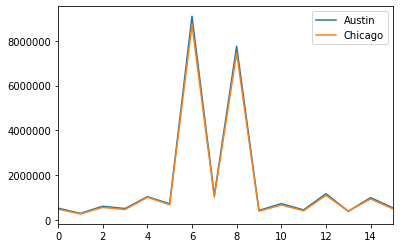

In [111]:
lines = comparison.plot.line()